In [ ]:
# Install library to share your visualization

!pip install -U datapane

In [ ]:
!pip install pyyaml==5.4.1

In [1]:
import pandas as pd 
import numpy as np 
import plotly.express as px
import plotly.graph_objects as go
import datapane as dp 

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [ ]:
!datapane login --token=+++your token+++

In [4]:
network = pd.read_csv('Connections.csv')
network.head(10)

,First Name,Last Name,Email Address,Company,Position,Connected On
0,Bhupinder Singh,Khural,NaN,DKFZ German Cancer Research Center,Computer Scientist,08-Mar-22
1,Dhaval,Sakhiya,NaN,NaN,NaN,04-Mar-22
2,Joan,Sanchez Varela,NaN,Simig Solutions,Freelance Big Data & Data Scientist,04-Mar-22
3,NAGARJUNA,GOTTIPATI,NaN,Tata Consultancy Services,Associate System Engineer,01-Mar-22
4,Mehul,Sasvadiya,NaN,Otto-von-Guericke University Magdeburg,Student Research Assistant,28-Feb-22
5,Michael,Bohlke-Schneider,NaN,Amazon Web Services (AWS),Senior Machine Learning Scientist,25-Feb-22
6,Simon,McAloon,NaN,CONNOR BLACK CONSULTING LTD,Senior Recruitment Specialist,25-Feb-22
7,Maria,Springer,NaN,MI4People,PR & Community Managerin,25-Feb-22
8,Bontu,Habtamu,NaN,AfriFana P.L.C,Co-Founder,24-Feb-22
9,Dr. Christian,Leschinski,NaN,Axel Springer National Media & Tech GmbH & Co. KG,Data Science Lead,23-Feb-22


In [11]:
figs = []

figs.append(dp.Text('# LinkedIn Network'))
figs.append(dp.Table(network.head(10)))

Bokeh version 2.3.3 is not supported, these plots may not display correctly, please install version ~=2.2.0
Folium version 0.8.3 is not supported, these plots may not display correctly, please install version >=0.12.0


In [ ]:
# Sample datapane code
import pandas as pd
import altair as alt

df = pd.read_csv('https://query1.finance.yahoo.com/v7/finance/download/GOOG?period2=1585222905&interval=1mo&events=history')

chart = alt.Chart(df).encode(
    x='Date:T',
    y='Open'
).mark_line().interactive()


import datapane as dp

# Scripts to create df and chart

# Once you have the df and the chart, simply use
r = dp.Report(
  dp.Text('My simple report'), #add description to the report
  dp.Table(df), #create a table
  dp.Plot(chart) #create a chart
)

# Publish your report. Make sure to have visibility='PUBLIC' if you want to share your report
r.publish(name='stock_report', visibility='PUBLIC')

In [11]:
network.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641 entries, 0 to 640
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   First Name     630 non-null    object
 1   Last Name      630 non-null    object
 2   Email Address  16 non-null     object
 3   Company        611 non-null    object
 4   Position       612 non-null    object
 5   Connected On   641 non-null    object
dtypes: object(6)
memory usage: 30.2+ KB


In [ ]:
network.describe()

In [13]:
import datetime

def convert(date):
    return datetime.datetime.strptime(date, "%d-%b-%y").strftime("%Y-%m-%d")

network["Connected On"] = network["Connected On"].apply(convert)

In [14]:
!pip install -U pandas_profiling

In [ ]:
from pandas_profiling import ProfileReport

profile = ProfileReport(network, title='LinkedIn Profiling Report', explorative=True)
profile 

In [6]:
network = network.sort_values(by='Connected On')

In [7]:
connections_line = px.line(network.groupby(by='Connected On').count().reset_index(), 
                           x="Connected On", 
                           y="First Name", 
                           labels={'First Name': 'Number'},
                           title='My Connections')
connections_line.show()

In [12]:
figs.append(dp.Plot(connections_line))

In [13]:
#Companies
company_groupby = network.groupby(by='Company').count().reset_index().sort_values(by='First Name', ascending=False).reset_index(drop=True)
company_groupby

,Company,First Name,Last Name,Email Address,Position,Connected On
0,Otto-von-Guericke University Magdeburg,14,14,2,14,14
1,Amazon,13,13,0,13,13
2,Pixsy,12,12,0,12,12
3,Tata Consultancy Services,12,12,0,12,12
4,Accenture,8,8,0,8,8
...,...,...,...,...,...,...
464,Fraunhofer IWS,1,1,0,1,1
465,Fraunhofer IPA,1,1,1,1,1
466,Fraunhofer IDMT,1,1,0,1,1
467,Fraunhofer Heinrich Hertz Institute HHI,1,1,0,1,1


In [14]:
fig = px.bar(company_groupby[:200],
      x='Company',
      y='First Name',
      labels={'First Name': 'Number'})
fig

In [15]:
figs.append(dp.Plot(fig))

In [16]:
#TreeMap
fig = px.treemap(company_groupby[:100], path=['Company', 'Position'],
          values='First Name',
          labels={'First Name': 'Number'})
fig

In [17]:
figs.append(dp.Plot(fig))

In [18]:
#First name
fig = px.bar(network.groupby(by='Last Name').count().sort_values(by='First Name', ascending=False).reset_index()[:100],
      x='Last Name',
      y='First Name')
fig 

In [19]:
figs.append(dp.Plot(fig))

In [20]:
#Position
network['Position'].value_counts()[network['Position'].value_counts()/len(network) * 100 > 0.5]

Data Scientist                52
Software Engineer             18
Master Thesis Student         12
Research Assistant            12
Data Engineer                  8
Student Research Assistant     7
Senior Software Engineer       7
Data Analyst                   6
Machine Learning Engineer      6
Software Developer             6
Data Science Intern            6
Senior Data Scientist          5
Consultant                     5
Working Student                5
Co-Founder                     5
CEO                            4
Master Thesis                  4
Name: Position, dtype: int64

In [21]:
fig = px.bar(network.groupby(by='Position').count().sort_values(by='First Name', ascending=False)[:10].reset_index(),
       x='Position',
       y='First Name',
       labels={'First Name': 'Number'},
        title= 'Positions in my LinkedIn Network'
      )

fig.show()

In [22]:
figs.append(dp.Plot(fig))

In [23]:
network.Position.str.startswith('Data Scientist').sum()

62

In [24]:
positions = ' '.join(network[~network.Position.isnull()].Position.unique())

In [25]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline


def make_wordcloud(new_text):
    ''''function to make wordcloud'''
    
    wordcloud = WordCloud(width = 800, height = 800, 
                min_font_size = 10,
                background_color='black', 
                colormap='Set2', 
                collocations=False).generate(new_text) 
    
    #wordcloud.recolor(color_func = grey_color_func)

    
    fig = plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show() 
    
    return fig

In [ ]:
!pip install wordcloud

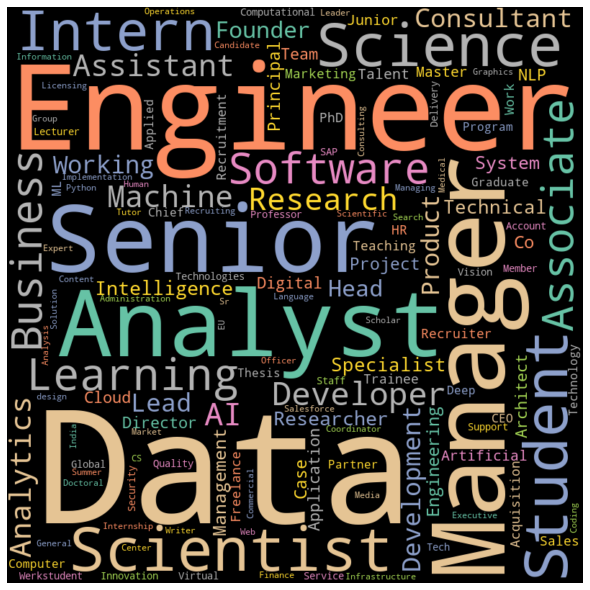

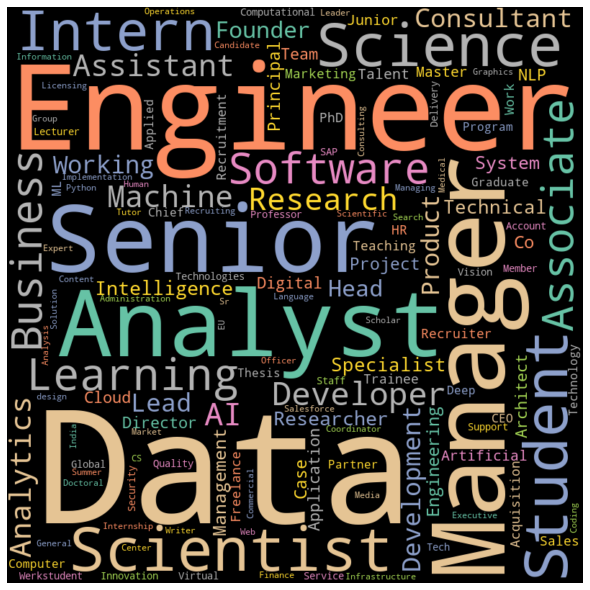

In [27]:
wordcloud = make_wordcloud(positions)
wordcloud

In [28]:
figs.append(dp.Plot(wordcloud))

In [ ]:
#Create a Report for the Plots
dp.Report(*figs).upload(name='Linkedin_network')

Analysing messages

In [ ]:
messages = pd.read_csv('messages.csv')
messages.head(10)

In [31]:
figs = []
figs.append(dp.Text('# LinkedIn Messages'))
figs.append(dp.Table(messages.head(10)))

In [ ]:
from pandas_profiling import ProfileReport

messages.profile_report()

In [33]:
import plotly.express as px 

fig = px.line(messages.groupby('DATE').count().sort_values(by='DATE').reset_index(), 
       x='DATE',
       #color='DIRECTION', 
       title='Number of messages overtime')

fig

In [34]:
figs.append(dp.Plot(fig))

In [35]:
#Drop message without any content 
messages = messages.dropna(subset=['CONTENT'])
messages = messages.CONTENT

In [ ]:
!pip install -U pip setuptools wheel
!pip install -U spacy
!python -m spacy download en_core_web_sm

In [ ]:
!pip install spacy-langdetect

In [39]:
#Language Detection
import spacy 
from spacy_langdetect import LanguageDetector
from spacy.language import Language
#nlp = spacy.load("en_core_web_sm")


def lang_detector(nlp, name):
    return LanguageDetector()

nlp = spacy.load("en_core_web_sm")
Language.factory("language_detector", func=lang_detector)
nlp.max_length = 2000000
nlp.add_pipe('language_detector', last=True)

In [40]:
text = 'This is an english text.'
doc = nlp(text)
# document level language detection. Think of it like average language of the document!
print(doc._.language)
# sentence level language detection
for sent in doc.sents:
   print(sent, sent._.language)

{'language': 'en', 'score': 0.9999968033764759}
This is an english text. {'language': 'en', 'score': 0.9999965624977911}


In [41]:
doc = nlp('Đây là Tiếng Việt')
# document level language detection. Think of it like average language of the document!
print(doc._.language)
# sentence level language detection
for sent in doc.sents:
   print(sent, sent._.language)

{'language': 'vi', 'score': 0.9999998813819094}
Đây là Tiếng Việt {'language': 'vi', 'score': 0.9999987637894494}


In [42]:
def is_english(nlp, text):
    '''Detect whether a text is English'''

    return nlp(text)._.language['language'] == 'en'


def extract_english_text(nlp, messages):
    '''Extract English text'''

    return [text for text in messages if is_english(nlp, text)]

In [43]:
english_messages = extract_english_text(nlp, messages)

In [44]:
#Named Entity
import spacy 
from spacy import displacy
from collections import Counter
import en_core_web_sm
from pprint import pprint
nlp = spacy.load("en_core_web_sm")

In [45]:
messages[1]

'Great, since when are you applying?'

In [46]:
message1 = nlp(messages[1])

In [47]:
pprint([(word, word.label_) for word in message1.ents])

[]


In [ ]:
displacy.serve(message1, style='ent')

In [49]:
all_messages = nlp(' '.join(english_messages))

In [50]:
labels = [x.label_ for x in all_messages.ents]
label_counter = Counter(labels)

def counter_to_df(counter):
    counter_df = pd.DataFrame.from_dict(counter, orient='index').reset_index()\
    .rename(columns={0:'Count'}).sort_values(by='Count', ascending=False)

    return counter_df
counter_df = counter_to_df(label_counter)

In [51]:
fig = px.bar(counter_df,
      x='index',
      y='Count',
    title='Named Entity')
fig

In [52]:
figs.append(dp.Plot(fig))

In [ ]:
!pip install contractions

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

In [58]:
#Preprocess
import re, string, unicodedata
import nltk
import contractions
import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

def remove_html(words):
    '''Remove message with html'''
    return re.sub(r'^<p.*</p>', '', words)

def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

def remove_URL(sample):
    """Remove URLs from a sample string"""
    return re.sub(r"http\S+", "", sample)


def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    return [unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore') for word in words]

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    return [word.lower() for word in words]

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    return [re.sub(r'[^\w\s]', '', word) for word in words]

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    return [p.number_to_words(word) if word.isdigit() else word for word in words]

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    return [word for word in words if word not in stopwords.words('english')]

def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    return [stemmer.stem(word) for word in words]

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word, pos='v') for word in words]

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = replace_numbers(words)
    words = remove_stopwords(words)
    # Remove space
    words = ' '.join(words).replace('  ', ' ').strip().split(' ')
    try: 
        words.remove('')
    except:
        pass 
   
    return words

def preprocess(sample):
    sample = remove_html(sample)
    sample = remove_URL(sample)
    sample = replace_contractions(sample)
    # Tokenize
    words = nltk.word_tokenize(sample)

    # Normalize
    words = normalize(words)
    #return sample
    return ' '.join(words)

In [61]:
processed = [preprocess(message) for message in english_messages]

In [62]:
# Remove empty string
while("" in processed) : 
    processed.remove("")     

In [63]:
#Count words
from collections import Counter
word_counter = Counter(' '.join(processed).split())

In [64]:
wordcounter_df = counter_to_df(word_counter)

In [65]:
wordcounter_df

,index,Count
12,would,143
61,conversation,132
179,shubham,115
69,added,87
2454,nbsp,83
...,...,...
1384,encoderdecoder,1
1383,yolo,1
1382,transformers,1
1381,architecture,1


In [66]:
fig = px.bar(pd.DataFrame.from_dict(wordcounter_df[:30]),
      x='index',
      y='Count')
fig

In [67]:
figs.append(dp.Plot(fig))

In [68]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [69]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline


def make_wordcloud(new_text):
    ''''funciton to make wordcloud'''
    
    wordcloud = WordCloud(width = 800, height = 800, 
                min_font_size = 10,
                background_color='black', 
                colormap='Set2', 
                collocations=False).generate(new_text) 
    
    #wordcloud.recolor(color_func = grey_color_func)

    
    fig = plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show() 
    
    return fig

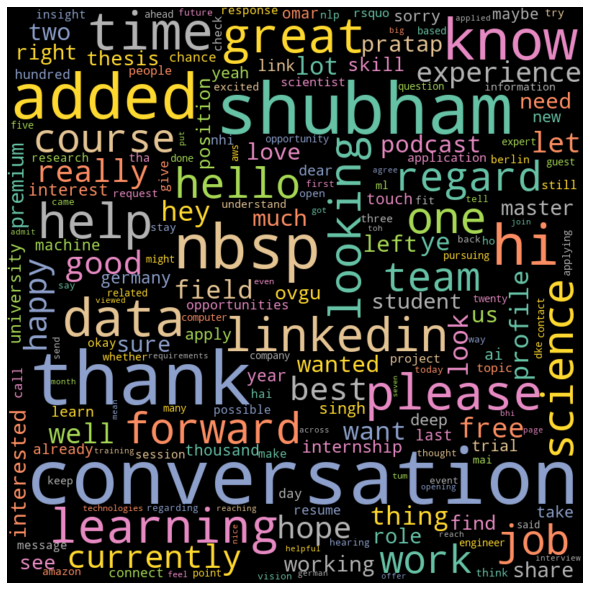

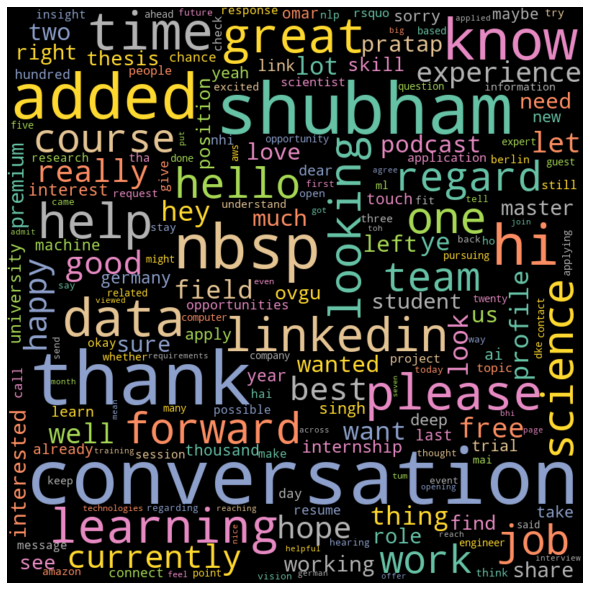

In [70]:
word_cloud = make_wordcloud(' '.join(processed))
word_cloud

In [71]:
figs.append(dp.Plot(word_cloud))

In [73]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [74]:
#Sentiment Analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer 

sentence = 'I love this weather'
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(sentence)

{'compound': 0.6369, 'neg': 0.0, 'neu': 0.323, 'pos': 0.677}

In [75]:
def predict_sentiment(sentence):
    
    sentiment_dict = sid.polarity_scores(sentence)
    
    # decide sentiment as positive, negative and neutral 
    if sentiment_dict['compound'] >= 0.05 : 
        return ("Positive", round(sentiment_dict['pos']*100, 2))
  
    elif sentiment_dict['compound'] <= - 0.05 : 
        return ("Negative", round(sentiment_dict['neg']*100, 2))
  
    else : 
        return ("Neutral", round(sentiment_dict['neu']*100, 2))

In [76]:
processed[3]

'understand exciting start applying jobs'

In [77]:
predict_sentiment(processed[3])

('Positive', 44.4)

In [78]:
sentiment = [predict_sentiment(message) for message in processed]
sentiment_df = pd.concat([pd.DataFrame(processed, columns=['Message']), pd.DataFrame(sentiment, columns=['Sentiment', 'Confident'])], axis=1)
sentiment_df.head(10)

,Message,Sentiment,Confident
0,last message arrive,Neutral,100.0
1,great since applying,Positive,67.2
2,already,Neutral,100.0
3,understand exciting start applying jobs,Positive,44.4
4,guess would prefer continue work data scientis...,Neutral,100.0
5,okay understand already know come,Positive,32.2
6,actually started working might take sixty-seve...,Neutral,100.0
7,yes receive last message could find time reply,Positive,27.8
8,last message arrive,Neutral,100.0
9,understand long master thesis take finish than...,Positive,46.4


In [79]:
import plotly.express as px 

fig = px.histogram(sentiment_df, 
      x='Sentiment',
        title='Sentiment in my LinkedIn Message')
fig

In [80]:
figs.append(dp.Plot(fig))

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

def visualise_sentiments(sentence):
    
    data = {
    "Sentence":["SENTENCE"] + sentence.split(),
    "Sentiment":[sid.polarity_scores(sentence)["compound"]] + [sid.polarity_scores(word)["compound"] for word in sentence.split()]
}
    f, ax = plt.subplots()
    
    sns.heatmap(pd.DataFrame(data).set_index("Sentence").T,center=0, annot=True, cmap = "PiYG")
    return f 

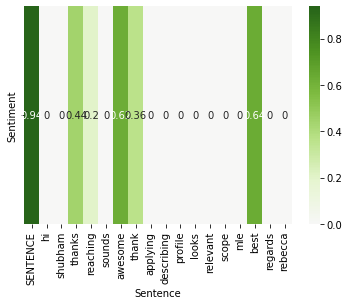

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

def visualise_sentiments(sentence):
    
    data = {
    "Sentence":["SENTENCE"] + sentence.split(),
    "Sentiment":[sid.polarity_scores(sentence)["compound"]] + [sid.polarity_scores(word)["compound"] for word in sentence.split()]
}
    f, ax = plt.subplots()
    
    sns.heatmap(pd.DataFrame(data).set_index("Sentence").T,center=0, annot=True, cmap = "PiYG")
    return f 
sentence = sample = list(sentiment_df[sentiment_df['Sentiment'] == 'Positive'].Message)[23]
plot = visualise_sentiments(sentence)

In [93]:
figs.append(dp.Plot(plot))

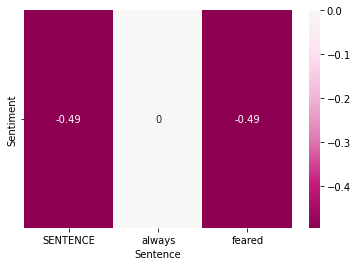

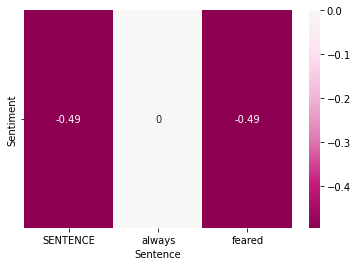

In [94]:
sample = list(sentiment_df[sentiment_df['Sentiment'] == 'Negative'].Message)[5]
fig = visualise_sentiments(sample)
fig

In [85]:
figs.append(dp.Plot(fig))

In [ ]:
#Create a Report for the Plots
dp.Report(*figs).upload(name='Linkedin_message', open=True)